In [17]:
import pandas as pd
df_wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

df_wine.columns=['Class label','Alcohol','Malic acid','Ash','Alcolinity of ash',
                'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                'Color intensity','Hue','0D280/0D315 of diluted wines','Proline']

In [18]:
df_wine=df_wine[df_wine['Class label']!=1]

y=df_wine['Class label'].values
X=df_wine[['Alcohol','0D280/0D315 of diluted wines']].values

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le=LabelEncoder()
y=le.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2,
                                              random_state=1,
                                              stratify=y)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',
                         n_estimators=30,
                         random_state=4)

rf.fit(X_train,y_train)
print('Random Forest test accuracies %.3f'%(rf.score(X_test,y_test)))

Random Forest test accuracies 0.958


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

le=LabelEncoder()
y=le.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2,
                                              random_state=1,
                                              stratify=y)

tree=DecisionTreeClassifier(criterion='entropy',
                           max_depth=1,
                           random_state=1)
ada=AdaBoostClassifier(base_estimator=tree,
                      n_estimators=500,
                      learning_rate=0.1,
                      random_state=6)
tree=tree.fit(X_train,y_train)
ada=ada.fit(X_train,y_train)
print('AdaBoost test accuracies %.3f'%(ada.score(X_test,y_test)))
print('DecisionTree test accuracies %.3f'%(tree.score(X_test,y_test)))

AdaBoost test accuracies 0.917
DecisionTree test accuracies 0.875


In [32]:
from matplotlib.colors import ListedColormap
import numpy as np
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
#Q
x_min,x_max=X_train[:,0].min()-1,X_train[:,0].max()+1
y_min,y_max=X_train[:,1].min()-1,X_train[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                 np.arange(y_min,y_max,.02))
z=tree.predict(np.c_[xx.ravel(),yy.ravel()])



(0.27, 4.6700000000000035)

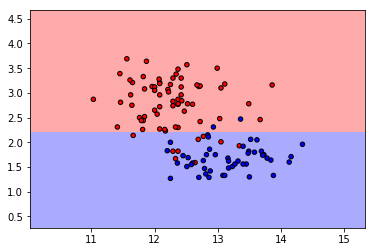

In [33]:
import matplotlib.pyplot as plt
Z=z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())